##### There are two type of test
- Prametric testing (When data is normally distributed)
- Non Parametric testing (When data is not normally distributed)


###### Prametric testing

- ###### Hypothesis Testing
 In Hypothesis testing will first define Null hypothesis about a smaple of the entire dataset, that assumes nothing interesting is going on. The Purpose of hypothesis testing is to prove that Null Hypothesis is true for the given sample data. If Null Hypothese fails for the sample then we will have an alternate hypothesis for the given smaple. 
 
Once Null and alternate Hypothesis is decided we will choose significance level. that is the probablity threshold that will decide when should we reject Hull Hypothesis. This value is called P-Value  

###### T-test
The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.


###### 1 Sample T-test

In [189]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statistics import mean

In [190]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 7,5

In [191]:
# generate list of Random age or Integer Values  for population

def age_generator(start, end, size):
    np.random.seed(7)
    age_list = []
    for i in range(0, size):
        age_list.append(np.random.randint(start,end))
    return age_list

        

In [192]:
india_marriage_age_male = age_generator(21,45,100)

In [193]:
india_marriage_age_female = age_generator(18,45,100)

### Normality Testing

In [194]:
print('Kurtosis of female age:{0} Kurtosis for Male Age: {1}'.
      format(stats.kurtosis(india_marriage_age_female),stats.kurtosis(india_marriage_age_male)))
print('Kurtosis Range is -1.96 < K < +1.96')

Kurtosis of female age:-1.3124844784351744 Kurtosis for Male Age: -1.2256352457450295
Kurtosis Range is -1.96 < K < +1.96


In [195]:
print('Skewness of female age:{0} Skewness for Male Age: {1}'.
      format(stats.skew(india_marriage_age_female),stats.skew(india_marriage_age_male)))
print('Skewness Range is -1.96 < S < +1.96')

Skewness of female age:0.09573616002388838 Skewness for Male Age: 0.13415372450833576
Skewness Range is -1.96 < S < +1.96


C:\Users\sabya\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


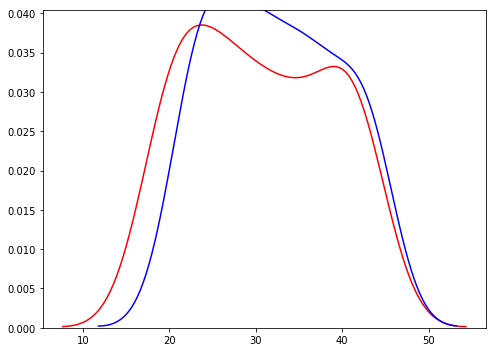

In [196]:
sns.distplot(india_marriage_age_female, hist=False,color='red' )
sns.distplot(india_marriage_age_male, hist=False,color='Blue' )
plt.figure(figsize=(20,10))
plt.show()

We have created sample age of Marriage in india for male and female. we will perform hypothesis Testing in created sample data and try to come up on a solution. 

## One Sample t-test

- ### Ho = Null Hypothesis -> Marriage age of male in India is 28
- ### Ha = Alternate Hypothesis - > Marriage age of male in India is NOT 28 

#### P value is 5%, if P value < 5%, we will reject Null hypothesis and Accept Alternate Hypothesis

In [197]:
stats.ttest_1samp(india_marriage_age_male, 28)

Ttest_1sampResult(statistic=5.863781996571321, pvalue=5.985490781794787e-08)

### P value is less than 0.05, so we can reject Null hypothesis and Accept Alternate Hypothesis.
### As t value is +ve we can say that, Average marriage Age is more than 28, close to 33

In [198]:
stats.ttest_1samp(india_marriage_age_male,32)

Ttest_1sampResult(statistic=0.3707777843265278, pvalue=0.7115952389877449)

In above test we can see that P value is 71.1%, which means we can accept 32 as the Ave marriage age of male in India. 

1 Sample T-test, is used in when we have one sample data and mean of the Population. 

### Two Sample indipendent t-test 

#### In two sample T-test we check two indipendent sample by defining Null Hypothesis and Alernate Hypothesis

##### In this example our Null Hypothesis would be
#### Ho - Marriage Age of male and Female in India is same
#### Ha - Marriage Age of male and Female in India is NOT Same

In [199]:
stats.ttest_ind(india_marriage_age_male,india_marriage_age_female)

Ttest_indResult(statistic=1.6090451564724044, pvalue=0.10919970690452206)

#### Here we can see that P Value = 10.9%, so we can reject Null Hypothesis and Accept Alternate Hypothesis. i.e, marriage age of male and female in India is not same. 

In two sample Indipendent T-test we have sample from indipendent group.

### Paired T-test or Relational T-test 

#### In paired T-test or Relational T-test we have same group doing two different things, 


#### Let's create a responsive test for RED BULL energy drink

- ###### In this test the sample will be same and we will test effect of RED BULL before drink and after Drink 

In [200]:
before_redbull = age_generator(20,40,10)
after_rebull = age_generator(15,32,10)

#### Normality Testing

C:\Users\sabya\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


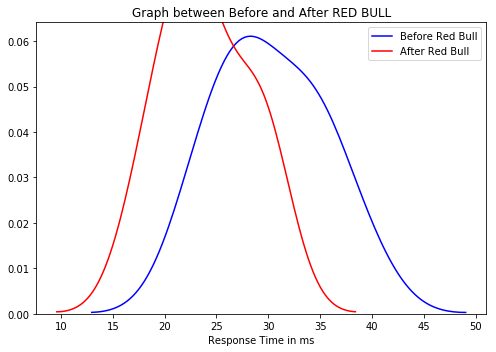

In [201]:
sns.distplot(before_redbull,hist=False,color='blue', label='Before Red Bull')
sns.distplot(after_rebull,hist=False,color='red', label= 'After Red Bull')
plt.xlabel('Response Time in ms')
plt.title('Graph between Before and After RED BULL')
plt.show()

###### Observation: Graph looks Normal

In [202]:
print('valid Range for Skewness and Kutosis  is \n{0} < S < +{1} \n{0} < K < +{1}'.format(-1.96,1.96))
print('Skewness for Before {0} and After {1} RED BULL'.format(stats.skew(before_redbull),stats.skew(after_rebull)))
print('Kurtosis for Before {0} and After {1} RED BULL'.format(stats.kurtosis(before_redbull),stats.kurtosis(after_rebull)))

valid Range for Skewness and Kutosis  is 
-1.96 < S < +1.96 
-1.96 < K < +1.96
Skewness for Before 0.20136135247971076 and After 0.17196423223441704 RED BULL
Kurtosis for Before -1.0383360135562614 and After -1.1966031084762059 RED BULL


- #### Ho = Response before RED BULL and after RED BULL is same
- #### Ha = Response before RED BULL and after RED BULL is NOT same

In [203]:
stats.ttest_rel(before_redbull,after_rebull)

Ttest_relResult(statistic=3.5690124375080132, pvalue=0.006033558904697545)

#### P < 0.05 we can see that P value is less than 5%, so we can reject the Null Hypothesis and Accept Alternate Hypothesis, which says 
#### "Response before RED BULL and after RED BULL is NOT same"

In [204]:
before_redbull

[35, 24, 23, 39, 27, 34, 28, 34, 30, 28]

In [205]:
after_rebull

[30, 19, 18, 22, 29, 23, 29, 25, 23, 22]

### ANOVA(Analysis of Variance) Test 

- #### In ANOVA test we calculate F score, that is ration between variance between the Group and Variance within the group.
- #### F = Var(Between the Group)/Var(within the Group)

if F value is higher than F critical then we will reject Null Hypothesis and accept Alternate hypothesis vice versa.

##### In this test we will test 3 out come from the same group. 
- #### For a given Group we have provided 3 different Drinks each morning and noted the response time. Now we want to check weither the Dirinks has different effect in thir response time or  are they same.

In [206]:
coffee_resp_time = age_generator(20,40,8)
lemonWater_resp_time = age_generator(25,42,8)
redbull_response_time = age_generator(12,25,8)

### Normality testing

C:\Users\sabya\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


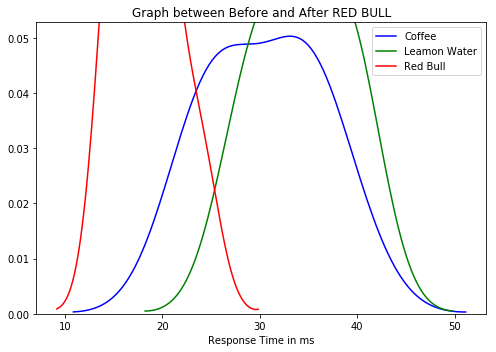

In [207]:
sns.distplot(coffee_resp_time,hist=False,color='blue', label='Coffee')
sns.distplot(lemonWater_resp_time,hist=False,color='green', label= 'Leamon Water')
sns.distplot(redbull_response_time,hist=False,color='red', label= 'Red Bull')
plt.xlabel('Response Time in ms')
plt.title('Graph between Before and After RED BULL')
plt.show()

#### H0 - Coffee, lemon water and Red Bull have same effect on response time.
#### Ha - Coffee, lemon water and Red Bull have NOT same effect on response time.

In [208]:
stats.f_oneway(coffee_resp_time,lemonWater_resp_time,redbull_response_time)

F_onewayResult(statistic=25.79586776859504, pvalue=2.207939695942674e-06)

##### The P value is 0.00022, which is very low than 5%, so we can reject Null Hypothesis and accept Alternate Hypothesis

# Conclusion:
1. ### At first we will do Normality testing of the given sample.
2. ### One Sample T-test : Check Hypothesis on One sample and gives us the Insight
3. ### Two Sample Indipendent T-test: Check the Hypothesis of two indipendent sample.
4. ### Paired T-test or Relation T-test: we test On same Group doing 2 different actions.
5. ### One-way ANOVA test: we test we test on relation of variance between within the Group and variance within the group. 